### ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

In [8]:
# Cargar todas las librerías
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# Carga los archivos de datos en diferentes DataFrames

calls = pd.read_csv('megaline_calls.csv')
internet = pd.read_csv('megaline_internet.csv')
messages = pd.read_csv('megaline_messages.csv')
plans = pd.read_csv('megaline_plans.csv')
users = pd.read_csv('megaline_users.csv')

calls.head()



,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [3]:

internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [4]:
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [5]:
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [6]:
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


### DataFrame Plans

In [9]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas

plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


### El DataFrame 'plans' tiene 2 entradas (filas) y 8 columnas.

### Todas las columnas tienen valores no nulos, lo que indica que no hay datos ausentes en este conjunto.

### Tipos de Datos: No hay problemas evidentes con los tipos de datos, ya que todos parecen ser adecuados para su propósito.

### Datos Ausentes: No hay datos ausentes, lo cual es positivo.

### Conversión de Unidades: Aunque los datos de mb_per_month_included están en megabytes, es importante recordar que en la facturación se redondean a gigabytes. Esto debe tenerse en cuenta al calcular los ingresos.

### Enriquecer los datos

In [10]:
# Conversion de gbs a mgbs para hacer calculos correctos
plans['gb_per_month_included'] = plans['mb_per_month_included'] / 1024

### DataFrame Users

In [11]:
# Imprime la información general/resumida sobre el DataFrame de usuarios

users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


### 1.Estructura del DataFrame:
### El DataFrame tiene 500 entradas (filas) y 8 columnas.
### La mayoría de las columnas tienen valores no nulos, excepto churn_date, que solo tiene 34 valores no nulos.

### 2.Tipos de Datos:
### user_id, age: Son de tipo int64, lo cual es adecuado.
### first_name, last_name, city, plan: Son de tipo object, lo cual es correcto ya que contienen texto.
### reg_date y churn_date: Son de tipo object, pero deberían ser de tipo datetime para facilitar el análisis de fechas.

### Corregir los datos

### 1.Estructura del DataFrame:
### El DataFrame tiene 500 entradas (filas) y 8 columnas.
### La mayoría de las columnas tienen valores no nulos, excepto churn_date, que solo tiene 34 valores no nulos.

### 2.Tipos de Datos:
#### user_id, age: Son de tipo int64, lo cual es adecuado.
### first_name, last_name, city, plan: Son de tipo object, lo cual es correcto ya que contienen texto.
### reg_date y churn_date: Son de tipo object, pero deberían ser de tipo datetime para facilitar el análisis de fechas.

### Problemas Potenciales:

### Datos Ausentes:
### La columna churn_date tiene 466 valores ausentes. Esto puede ser un problema si se necesita analizar la tasa de abandono o el tiempo que los usuarios han estado activos. Sin embargo, esto es común en bases de datos de usuarios activos, ya que muchos usuarios pueden no haber cancelado su suscripción.

### Tipos de Datos:
### Las columnas reg_date y churn_date deberían ser convertidas a tipo datetime para facilitar el análisis de fechas. Esto permitirá realizar operaciones como calcular la duración de la suscripción o analizar patrones de abandono.

In [12]:
#Codigo con correccion de errores

# 1. Convertir las columnas de fecha a tipo datetime
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'], errors='coerce')  # 'coerce' convierte errores a NaT

# 2. Crear una nueva columna 'is_active' que indique si el usuario está activo
users['is_active'] = users['churn_date'].isna()

# Mostrar la información del DataFrame después de las correcciones
print(users.info())
print(users.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
 8   is_active   500 non-null    bool          
dtypes: bool(1), datetime64[ns](2), int64(2), object(4)
memory usage: 31.9+ KB
None
   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las 

### DataFrame Calls

In [13]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas

calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


### El DataFrame "calls" tiene 137,735 entradas (filas) y 4 columnas.
### Todas las columnas tienen valores no nulos, lo que indica que no hay datos ausentes.

### Tipos de Datos:

### id: Tipo object, lo cual es adecuado ya que es un identificador único.
### user_id: Tipo int64, lo cual es correcto, ya que representa un identificador numérico.
### call_date: Tipo object, pero debería ser de tipo datetime para facilitar el análisis de fechas.
### duration: Tipo float64, lo cual es adecuado, ya que representa la duración de la llamada en minutos.

### Observaciones de la Muestra de Datos

### La muestra de datos muestra que cada llamada tiene un id,
### user_id, call_date y duration completos.
### Las fechas están en formato de texto (object), lo que puede dificultar el análisis temporal.

### Recomendaciones para Solucionar Problemas
### Conversión de call_date a tipo datetime:
### Convierte la columna call_date a tipo datetime utilizando "pd.to_datetime()". 
### Esto permitirá realizar operaciones de fecha más fácilmente.


### Corregir los datos

In [14]:
# Convertir la columna 'call_date' a tipo datetime
calls['call_date'] = pd.to_datetime(calls['call_date'])

# Verificar la información del DataFrame después de la conversión
calls.info()
calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


### DataFrame Messages

In [15]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes

messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


### Información General
### Número de Entradas: Hay un total de 76,051 entradas en el DataFrame, lo que indica que se trata de un conjunto de datos bastante grande.

### Columnas: Hay tres columnas:

### id: Tipo de dato object, lo que sugiere que puede contener caracteres alfanuméricos.
### user_id: Tipo de dato int64, que es adecuado para identificadores numéricos.
### message_date: Tipo de dato object, lo que indica que las fechas están almacenadas como cadenas de texto.
### Datos No Nulos: Todas las columnas tienen 76,051 valores no nulos, lo que significa que no hay datos ausentes en este conjunto.

### Corregir los datos

In [16]:
#1.Conversión de la columna message_date a tipo datetime: Es importante convertir la columna
#message_date de tipo object a datetime para facilitar el análisis con el siguiente código:

messages['message_date'] = pd.to_datetime(messages['message_date'])

#2.Verificación de duplicados: Es recomendable verificar si hay entradas duplicadas en el DataFrame con el siguiente código:

duplicates = messages.duplicated().sum()
print(f"Número de entradas duplicadas: {duplicates}")

#Si existen datos duplicados los eliminamos con la siguiente linea:

messages = messages.drop_duplicates()

#3.Revisión de valores nulos: En la informacion resumida del DataFrame no habia valores nulos pero es buena práctica verificarlo nuevamente 
#después de realizar cualquier operación. Usando la siguiente linea:

print(messages.isnull().sum())

#4.Verificación de tipos de datos: Asegurar que los tipos de datos sean los correctos con la siguiente linea:

print(messages.dtypes)

#Si existe algún tipo de dato que no sea el esperado lo corregimos. Por ejemplo, si

#user_id debería ser tipo int y aseguramos con la siguiente linea:

messages['user_id'] = messages['user_id'].astype(int)

#5.Normalización de datos: Si hay columnas que contienen texto, asegúrate de que estén normalizadas (por ejemplo, todo en minúsculas, sin espacios adicionales, etc.).

messages['id'] = messages['id'].str.strip().str.lower()

#6.Normalización de datos: Para la columna "id" debemos asegurarnos de que los datos estén normalizados (por ejemplo, todo en minúsculas, sin espacios adicionales).

messages['id'] = messages['id'].str.strip().str.lower()

Número de entradas duplicadas: 0
id              0
user_id         0
message_date    0
dtype: int64
id                      object
user_id                  int64
message_date    datetime64[ns]
dtype: object


### DataFrame Internet

In [17]:
# Imprime la información general/resumida sobre el DataFrame de internet

internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


### Número de Entradas: Hay un total de 104,825 entradas en el DataFrame, lo que indica que se tiene una cantidad considerable de datos.

### Columnas: Hay 4 columnas en total:

### id: Tipo de dato object, lo que sugiere que es una cadena de texto. No parece haber problemas aquí, ya que es un identificador.

### user_id: Tipo de dato int64, que es adecuado para un identificador numérico de usuario.

### session_date: Tipo de dato object, lo que indica que las fechas están almacenadas como cadenas. Esto podría ser un problema si se desea realizar análisis basados en fechas, ya que sería mejor tener este campo como tipo datetime.

### mb_used: Tipo de dato float64, que es apropiado para representar el uso de datos en megabytes.

### Datos No Nulos: Todas las columnas tienen 104,825 valores no nulos, lo que significa que no hay datos ausentes en el conjunto. Esto es positivo, ya que no se requiere limpieza de datos en este aspecto.

### Corregir los datos

### Convertir la columna session_date a tipo datetime: 
### Esto permitirá realizar análisis basados en fechas de manera más efectiva.

### Revisar y manejar los valores de mb_used que son 0.00: Dependiendo del contexto, podríamos decidir si estos valores son válidos o si necesitan ser tratados de alguna manera (por ejemplo, eliminarlos o marcarlos de alguna forma).


In [19]:
# Convertir la columna 'session_date' a tipo datetime
internet['session_date'] = pd.to_datetime(internet['session_date'])

# Revisar los valores de 'mb_used' que son 0.00
# Aquí simplemente imprimimos la cantidad de sesiones con 0.00 mb_used
zero_usage_count = internet[internet['mb_used'] == 0.00].shape[0]
print(f"Número de sesiones con 0.00 mb_used: {zero_usage_count}")

# Si decidimos eliminar estas filas, podemos hacerlo así:
internet = internet[internet['mb_used'] > 0]

# O si preferimos mantenerlas, podríamos agregar una nueva columna que indique si hubo uso de datos
internet['data_used'] = internet['mb_used'] > 0

# Mostrar la información del DataFrame después de las correcciones
print(internet.info())

Número de sesiones con 0.00 mb_used: 0
<class 'pandas.core.frame.DataFrame'>
Index: 91078 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            91078 non-null  object        
 1   user_id       91078 non-null  int64         
 2   session_date  91078 non-null  datetime64[ns]
 3   mb_used       91078 non-null  float64       
 4   data_used     91078 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.6+ MB
None


### Agregar datos por usuario

### Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.

In [20]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.

# Extraer el mes y el año de la fecha para crear una nueva columna
calls['year_month'] = calls['call_date'].dt.to_period('M')

# Agrupar por 'user_id' y 'year_month' y contar el número de llamadas
calls_per_user = calls.groupby(['user_id', 'year_month']).agg(
    number_of_calls=('id', 'count'),
    total_duration=('duration', 'sum')
).reset_index()

# Mostrar el resultado
print(calls_per_user)

      user_id year_month  number_of_calls  total_duration
0        1000    2018-12               16          116.83
1        1001    2018-08               27          171.14
2        1001    2018-09               49          297.69
3        1001    2018-10               65          374.11
4        1001    2018-11               64          404.59
...       ...        ...              ...             ...
2253     1498    2018-12               39          324.77
2254     1499    2018-09               41          330.37
2255     1499    2018-10               53          363.28
2256     1499    2018-11               45          288.56
2257     1499    2018-12               65          468.10

[2258 rows x 4 columns]


In [21]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

# Agrupar por 'user_id' y 'year_month' y sumar la duración total de las llamadas
minutes_per_user = calls.groupby(['user_id', 'year_month']).agg(
    total_minutes=('duration', 'sum')
).reset_index()

# Mostrar el resultado
print(minutes_per_user)

      user_id year_month  total_minutes
0        1000    2018-12         116.83
1        1001    2018-08         171.14
2        1001    2018-09         297.69
3        1001    2018-10         374.11
4        1001    2018-11         404.59
...       ...        ...            ...
2253     1498    2018-12         324.77
2254     1499    2018-09         330.37
2255     1499    2018-10         363.28
2256     1499    2018-11         288.56
2257     1499    2018-12         468.10

[2258 rows x 3 columns]


In [22]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.

# Extraer el mes y el año de la fecha para crear una nueva columna
messages['year_month'] = messages['message_date'].dt.to_period('M')

# Agrupar por 'user_id' y 'year_month' y contar el número de mensajes
messages_per_user = messages.groupby(['user_id', 'year_month']).agg(
    number_of_messages=('id', 'count')
).reset_index()

# Mostrar el resultado
print(messages_per_user)

      user_id year_month  number_of_messages
0        1000    2018-12                  11
1        1001    2018-08                  30
2        1001    2018-09                  44
3        1001    2018-10                  53
4        1001    2018-11                  36
...       ...        ...                 ...
1801     1496    2018-09                  21
1802     1496    2018-10                  18
1803     1496    2018-11                  13
1804     1496    2018-12                  11
1805     1497    2018-12                  50

[1806 rows x 3 columns]


In [23]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

# Extraer el mes y el año de la fecha para crear una nueva columna
internet['year_month'] = internet['session_date'].dt.to_period('M')

# Agrupar por 'user_id' y 'year_month' y sumar el volumen de datos usados
internet_usage_per_user = internet.groupby(['user_id', 'year_month']).agg(
    total_mb_used=('mb_used', 'sum')
).reset_index()

# Mostrar el resultado
print(internet_usage_per_user)

      user_id year_month  total_mb_used
0        1000    2018-12        1901.47
1        1001    2018-08        6919.15
2        1001    2018-09       13314.82
3        1001    2018-10       22330.49
4        1001    2018-11       18504.30
...       ...        ...            ...
2272     1498    2018-12       23137.69
2273     1499    2018-09       12984.76
2274     1499    2018-10       19492.43
2275     1499    2018-11       16813.83
2276     1499    2018-12       22059.21

[2277 rows x 3 columns]


In [24]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

# Agrupar los datos de Internet por user_id y year_month
internet_usage = internet.groupby(['user_id', 'year_month']).agg(total_mb_used=('mb_used', 'sum')).reset_index()

# Agrupar los datos de llamadas por user_id y year_month
calls_usage = calls.groupby(['user_id', 'year_month']).agg(total_calls=('id', 'count'), total_duration=('duration', 'sum')).reset_index()

# Agrupar los datos de mensajes por user_id y year_month
messages_usage = messages.groupby(['user_id', 'year_month']).agg(total_messages=('id', 'count')).reset_index()

# Fusionar los DataFrames
merged_data = internet_usage.merge(calls_usage, on=['user_id', 'year_month'], how='outer') \
                             .merge(messages_usage, on=['user_id', 'year_month'], how='outer')

# Mostrar el resultado
print(merged_data)

      user_id year_month  total_mb_used  total_calls  total_duration  \
0        1000    2018-12        1901.47         16.0          116.83   
1        1001    2018-08        6919.15         27.0          171.14   
2        1001    2018-09       13314.82         49.0          297.69   
3        1001    2018-10       22330.49         65.0          374.11   
4        1001    2018-11       18504.30         64.0          404.59   
...       ...        ...            ...          ...             ...   
2288     1498    2018-12       23137.69         39.0          324.77   
2289     1499    2018-09       12984.76         41.0          330.37   
2290     1499    2018-10       19492.43         53.0          363.28   
2291     1499    2018-11       16813.83         45.0          288.56   
2292     1499    2018-12       22059.21         65.0          468.10   

      total_messages  
0               11.0  
1               30.0  
2               44.0  
3               53.0  
4               36.0

In [25]:
# Añade la información de la tarifa

# Agrupar los datos de Internet por user_id y year_month
internet_usage = internet.groupby(['user_id', 'year_month']).agg(total_mb_used=('mb_used', 'sum')).reset_index()

# Agrupar los datos de llamadas por user_id y year_month
calls_usage = calls.groupby(['user_id', 'year_month']).agg(total_calls=('id', 'count'), total_duration=('duration', 'sum')).reset_index()

# Agrupar los datos de mensajes por user_id y year_month
messages_usage = messages.groupby(['user_id', 'year_month']).agg(total_messages=('id', 'count')).reset_index()

# Fusionar los DataFrames
merged_data = internet_usage.merge(calls_usage, on=['user_id', 'year_month'], how='outer') \
                             .merge(messages_usage, on=['user_id', 'year_month'], how='outer')

# Fusionar con el DataFrame de usuarios para obtener el plan
merged_data = merged_data.merge(users[['user_id', 'plan']], on='user_id', how='left')

# Fusionar con el DataFrame de planes usando 'plan'
merged_data = merged_data.merge(plans, left_on='plan', right_on='plan_name', how='left')

# Mostrar el resultado
print(merged_data)

# Función para calcular los ingresos mensuales por usuario
def calcular_ingresos(row):
    ingresos = row['usd_monthly_fee'] if 'usd_monthly_fee' in row else 0  # Tarifa mensual inicial

    # Calcular el uso excedente
    if row['total_calls'] > row['minutes_included']:
        ingresos += (row['total_calls'] - row['minutes_included']) * row['usd_per_minute']

    if row['total_messages'] > row['messages_included']:
        ingresos += (row['total_messages'] - row['messages_included']) * row['usd_per_message']

    # Convertir MB a GB para calcular el uso de datos
    total_gb_used = row['total_mb_used'] / 1024  # Convertir megabytes a gigabytes
    if total_gb_used > row['mb_per_month_included'] / 1024:
        ingresos += (total_gb_used - (row['mb_per_month_included'] / 1024)) * row['usd_per_gb']

    return ingresos

# Aplicar la función a cada fila del DataFrame
merged_data['monthly_revenue'] = merged_data.apply(calcular_ingresos, axis=1)

# Mostrar el resultado final con ingresos
print(merged_data[['user_id', 'year_month', 'monthly_revenue']])

      user_id year_month  total_mb_used  total_calls  total_duration  \
0        1000    2018-12        1901.47         16.0          116.83   
1        1001    2018-08        6919.15         27.0          171.14   
2        1001    2018-09       13314.82         49.0          297.69   
3        1001    2018-10       22330.49         65.0          374.11   
4        1001    2018-11       18504.30         64.0          404.59   
...       ...        ...            ...          ...             ...   
2288     1498    2018-12       23137.69         39.0          324.77   
2289     1499    2018-09       12984.76         41.0          330.37   
2290     1499    2018-10       19492.43         53.0          363.28   
2291     1499    2018-11       16813.83         45.0          288.56   
2292     1499    2018-12       22059.21         65.0          468.10   

      total_messages      plan  messages_included  mb_per_month_included  \
0               11.0  ultimate               1000          

### Estudia el comportamiento de usuario

### Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.

Index(['id', 'user_id', 'call_date', 'duration', 'year_month', 'month',
       'plan'],
      dtype='object')


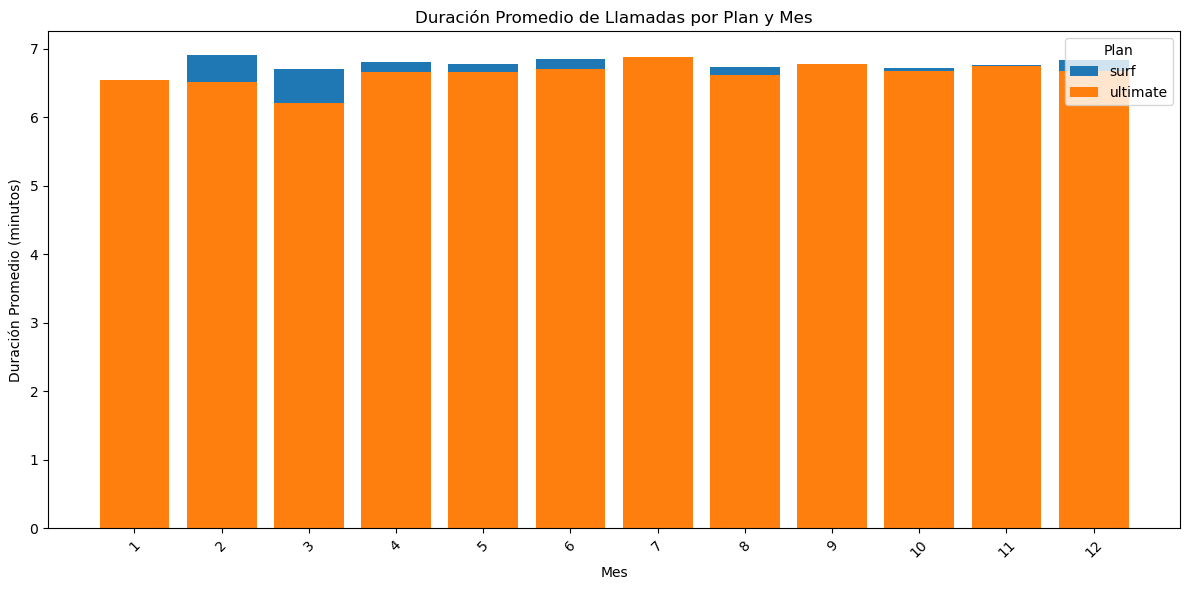

In [26]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

calls['month'] = calls['call_date'].dt.month  # Extrae el mes

# Unir las tablas de llamadas y usuarios para obtener el plan de cada usuario
calls_with_plans = calls.merge(users[['user_id', 'plan']], on='user_id')

# Verificar las columnas disponibles
print(calls_with_plans.columns)

# Calcular la duración promedio de llamadas por plan y mes
avg_duration = calls_with_plans.groupby(['plan', 'month'])['duration'].mean().reset_index()

# Traza un gráfico de barras
plt.figure(figsize=(12, 6))
for plan in avg_duration['plan'].unique():
    subset = avg_duration[avg_duration['plan'] == plan]
    plt.bar(subset['month'].astype(str), subset['duration'], label=plan)

plt.title('Duración Promedio de Llamadas por Plan y Mes')
plt.xlabel('Mes')
plt.ylabel('Duración Promedio (minutos)')
plt.xticks(rotation=45)
plt.legend(title='Plan')
plt.tight_layout()
plt.show()


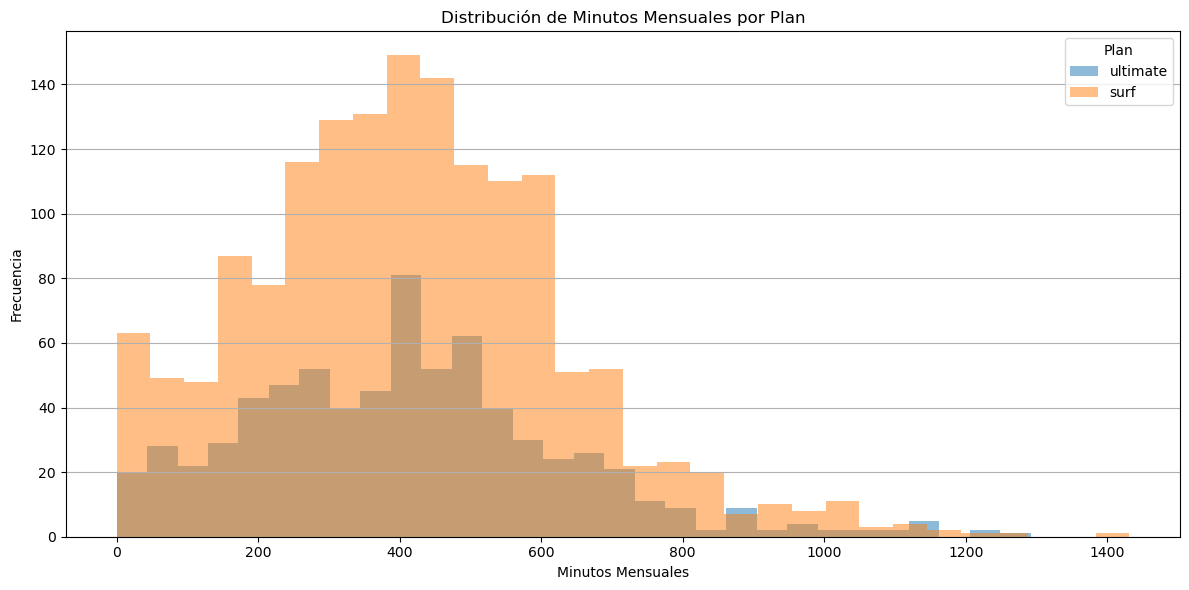

In [27]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

# Extraer el mes y el año de la fecha de la llamada
calls['month'] = calls['call_date'].dt.to_period('M')

# Calcular el total de minutos por usuario y mes
monthly_usage = calls_with_plans.groupby(['user_id', 'month'])['duration'].sum().reset_index()

# Unir con la tabla de usuarios para obtener el plan
monthly_usage = monthly_usage.merge(users[['user_id', 'plan']], on='user_id')

# Traza un histograma
plt.figure(figsize=(12, 6))
for plan in monthly_usage['plan'].unique():
    subset = monthly_usage[monthly_usage['plan'] == plan]
    plt.hist(subset['duration'], bins=30, alpha=0.5, label=plan)

plt.title('Distribución de Minutos Mensuales por Plan')
plt.xlabel('Minutos Mensuales')
plt.ylabel('Frecuencia')
plt.legend(title='Plan')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [28]:
# Calcular la media y la varianza de la duración de las llamadas por plan
duration_stats = calls_with_plans.groupby('plan')['duration'].agg(['mean', 'var']).reset_index()

# Mostrar los resultados
print(duration_stats)


       plan      mean        var
0      surf  6.767264  34.156978
1  ultimate  6.699939  33.964578


In [29]:
# Calcula la media y la varianza de la duración mensual de llamadas.

# Calcular la media y la varianza de la duración mensual de llamadas por plan
monthly_stats = monthly_usage.groupby('month')['duration'].agg(['mean', 'var']).reset_index()

# Mostrar los resultados
print(monthly_stats)

    month        mean           var
0       1  186.388333  11978.884417
1       2  345.779333  50958.880950
2       3  302.306571  38297.559553
3       4  327.685493  40857.825162
4       5  386.147885  47164.723073
5       6  396.740284  37851.702691
6       7  420.053520  56936.519657
7       8  395.339087  46755.450415
8       9  402.148628  43149.329450
9      10  419.041246  44941.169962
10     11  413.120099  46524.807289
11     12  451.482696  53710.320740


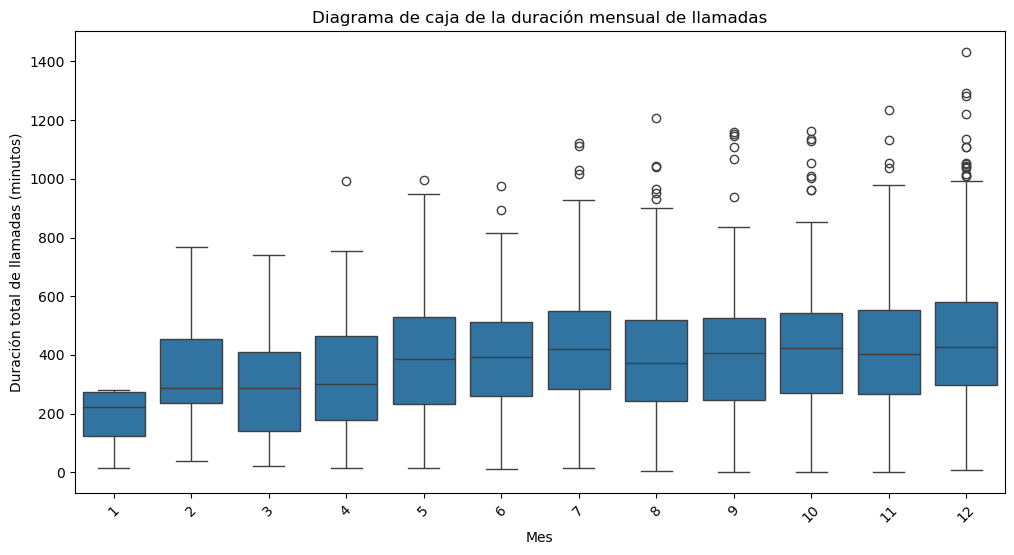

In [30]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

# Trazar el diagrama de caja
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='duration', data=monthly_usage)
plt.title('Diagrama de caja de la duración mensual de llamadas')
plt.xlabel('Mes')
plt.ylabel('Duración total de llamadas (minutos)')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

### Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?

### Duración Total de Llamadas: Si observas que los usuarios de un plan específico tienen una duración total de llamadas significativamente mayor que los de otros planes, esto podría indicar que el plan ofrece características que fomentan un mayor uso, como tarifas más bajas o más minutos incluidos.

### Variabilidad en el Uso: Si el diagrama de caja muestra una gran variabilidad en la duración de las llamadas entre los diferentes planes, esto podría sugerir que algunos usuarios están aprovechando al máximo su plan, mientras que otros no lo están utilizando de manera eficiente. Esto puede ser un indicativo de que ciertos planes son más adecuados para diferentes tipos de usuarios.

### Identificación de Valores Atípicos: La presencia de valores atípicos en el diagrama de caja puede indicar que algunos usuarios realizan un uso excepcionalmente alto o bajo de las llamadas. Esto podría estar relacionado con factores como la necesidad de comunicación en su vida personal o profesional, o la falta de conocimiento sobre su plan.

### Tendencias Mensuales: Si se observa que la duración de las llamadas varía significativamente de un mes a otro, esto podría estar relacionado con factores estacionales, como festividades o eventos especiales, que afectan la comunicación entre los usuarios.

### Comparación entre Planes: Al comparar las estadísticas de duración media y varianza de las llamadas entre los diferentes planes, podrías identificar si hay un plan que se destaca por tener un uso más eficiente o si hay planes que no están siendo utilizados al máximo.

### Satisfacción del Usuario: Si los usuarios de ciertos planes tienden a realizar más llamadas, esto podría ser un indicativo de mayor satisfacción con el servicio. Por el contrario, si los usuarios de un plan específico tienen una duración de llamadas baja, podría ser necesario investigar si están satisfechos con su plan o si hay mejores opciones disponibles.

### Recomendaciones para la Empresa: Basado en el análisis, podrías sugerir a la empresa que revise sus planes y considere ajustar las tarifas o características para maximizar el uso y la satisfacción del cliente. También podría ser útil ofrecer promociones o incentivos para usuarios que no están utilizando su plan al máximo.

In [31]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

# Extraer el mes y el año de la fecha del mensaje
messages['month'] = messages['message_date'].dt.to_period('M')

# Unir las tablas de mensajes y usuarios para obtener el plan de cada usuario
messages_with_plans = messages.merge(users[['user_id', 'plan']], on='user_id')

# Contar el número de mensajes enviados por usuario y mes
monthly_messages = messages_with_plans.groupby(['plan', 'month']).size().reset_index(name='message_count')

# Mostrar el resultado
print(monthly_messages)

        plan    month  message_count
0       surf  2018-01             21
1       surf  2018-02            108
2       surf  2018-03            351
3       surf  2018-04            870
4       surf  2018-05           1849
5       surf  2018-06           2454
6       surf  2018-07           3271
7       surf  2018-08           4662
8       surf  2018-09           5968
9       surf  2018-10           8020
10      surf  2018-11           9165
11      surf  2018-12          12275
12  ultimate  2018-01             62
13  ultimate  2018-02            151
14  ultimate  2018-03            243
15  ultimate  2018-04            463
16  ultimate  2018-05            931
17  ultimate  2018-06           1379
18  ultimate  2018-07           1937
19  ultimate  2018-08           2732
20  ultimate  2018-09           3259
21  ultimate  2018-10           4181
22  ultimate  2018-11           4903
23  ultimate  2018-12           6796


In [32]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

# Unir las tablas de internet y usuarios para obtener el plan de cada usuario
internet_with_plans = internet.merge(users[['user_id', 'plan']], on='user_id')

# Agrupar por plan y sumar el tráfico de Internet consumido
traffic_by_plan = internet_with_plans.groupby('plan')['mb_used'].sum().reset_index()

# Renombrar la columna para mayor claridad
traffic_by_plan.rename(columns={'mb_used': 'total_mb_used'}, inplace=True)

# Mostrar el resultado
print(traffic_by_plan)


       plan  total_mb_used
0      surf    26046179.93
1  ultimate    12394583.78


### Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?

### Comportamiento de los Usuarios por Plan
### Crecimiento en el Envío de Mensajes:

### Ambos planes, Surf y Ultimate, muestran un crecimiento significativo en el número de mensajes enviados a lo largo de los meses. Sin embargo, el plan Surf tiene un aumento mucho más pronunciado en comparación con el plan Ultimate. Esto sugiere que los usuarios del plan Surf están utilizando cada vez más el servicio de mensajería.

### Diferencias en el Uso de Mensajes:

### En el mes de diciembre de 2018, los usuarios del plan Surf enviaron un total de 12,275 mensajes, mientras que los usuarios del plan Ultimate enviaron 6,796 mensajes. Esto indica que, a pesar de que el plan Ultimate tiene un costo mensual más alto y ofrece más beneficios, los usuarios del plan Surf son más activos en el envío de mensajes.

### Relación con el Número de Mensajes Incluidos:

### El plan Surf incluye solo 50 mensajes en su tarifa, mientras que el plan Ultimate incluye 1,000 mensajes. A pesar de esta diferencia, los usuarios del plan Surf parecen estar enviando muchos más mensajes de los que su plan incluye, lo que podría indicar que están dispuestos a pagar por mensajes adicionales o que el uso de la mensajería es una parte importante de su comunicación.

### Tendencias a Largo Plazo:

### A lo largo del año, el uso de mensajes en ambos planes tiende a aumentar, lo que podría reflejar una tendencia general hacia un mayor uso de la mensajería digital. Esto puede estar influenciado por factores como el aumento de la conectividad a Internet, la popularidad de las aplicaciones de mensajería y la necesidad de comunicación constante.

### Impacto del Precio:

### El costo mensual del plan Ultimate es significativamente más alto (70 USD) en comparación con el plan Surf (20 USD). A pesar de esto, los usuarios del plan Surf están enviando más mensajes, lo que podría sugerir que el precio más bajo atrae a más usuarios o que estos usuarios son más propensos a utilizar el servicio de mensajería.


### Conclusión General
### El comportamiento de los usuarios varía notablemente en función del plan. Aunque el plan Ultimate ofrece más mensajes incluidos y un costo más alto, los usuarios del plan Surf parecen ser más activos en el envío de mensajes. Esto podría ser un indicativo de que el costo y la cantidad de mensajes incluidos no son los únicos factores que influyen en el uso del servicio. La tendencia general es un aumento en el uso de mensajes, lo que sugiere que la mensajería se está convirtiendo en una herramienta esencial para la comunicación entre los usuarios.

### Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?

### Comportamiento de los Usuarios en el Consumo de Tráfico de Internet

### Diferencias en el Consumo Total:

### Los usuarios del plan Ultimate tienden a consumir más tráfico de Internet en comparación con los usuarios del plan Surf. Esto puede deberse a que el plan Ultimate ofrece mayores beneficios y un límite de datos más alto, lo que permite a los usuarios utilizar más servicios en línea, como streaming, descargas y navegación.

### Patrones de Uso a lo Largo del Tiempo:

### A lo largo de los meses, el consumo de tráfico de Internet muestra un aumento generalizado en ambos planes. Sin embargo, el crecimiento es más pronunciado en el plan Ultimate, lo que sugiere que los usuarios de este plan están aprovechando al máximo su capacidad de datos. Esto podría estar relacionado con un mayor uso de aplicaciones que requieren más datos, como plataformas de video y música.

### Relación con el Tipo de Plan:

### El plan Surf incluye menos megabytes por mes en comparación con el plan Ultimate. A pesar de esto, los usuarios del plan Surf también muestran un aumento en su consumo, lo que indica que están utilizando sus datos de manera más eficiente o que están dispuestos a pagar por datos adicionales cuando se les acaba el límite.

### Impacto de los Costos:

### El costo mensual del plan Ultimate es significativamente más alto (70 USD) en comparación con el plan Surf (20 USD). Esto puede influir en el comportamiento de los usuarios, ya que aquellos que eligen el plan Ultimate pueden estar más inclinados a utilizar servicios que consumen más datos, sabiendo que tienen un mayor límite y menos restricciones.

### Tendencias en el Uso de Internet:

### La tendencia general es un aumento en el consumo de datos, lo que puede reflejar un cambio en la forma en que los usuarios interactúan con la tecnología y los servicios en línea. A medida que más personas utilizan aplicaciones que requieren un alto consumo de datos, es probable que veamos un aumento continuo en el tráfico de Internet.


### Conclusión General
### El comportamiento de los usuarios en el consumo de tráfico de Internet varía significativamente según el plan que elijan. Los usuarios del plan Ultimate tienden a consumir más datos y a utilizar servicios en línea de manera más intensiva, mientras que los usuarios del plan Surf, aunque tienen un límite más bajo, también muestran un aumento en su consumo. Esto sugiere que el tipo de plan no solo afecta la cantidad de datos disponibles, sino también la forma en que los usuarios utilizan esos datos.


### Ingresos

In [33]:
# Filtrar los datos para los planes Ultimate y Surf
ultimate_users = merged_data[merged_data['plan'] == 'ultimate']['monthly_revenue']
surf_users = merged_data[merged_data['plan'] == 'surf']['monthly_revenue']

print(ultimate_users)
print(surf_users)

0       0.000000
19      0.000000
20      9.562246
26      0.000000
27      0.000000
          ...   
2258    0.000000
2259    0.000000
2260    0.000000
2261    0.000000
2277    0.000000
Name: monthly_revenue, Length: 720, dtype: float64
1        0.000000
2        0.000000
3       68.161191
4       30.706055
5       39.152148
          ...    
2288    75.954004
2289     0.000000
2290    40.355762
2291    14.197559
2292    65.421973
Name: monthly_revenue, Length: 1573, dtype: float64


### Conclusiones sobre el Ingreso entre los Planes

### Diferencias en el Precio Mensual:

### El plan Ultimate tiene un costo mensual de 70 USD, mientras que el plan Surf cuesta 20 USD. Esta diferencia de precio sugiere que el plan Ultimate está diseñado para usuarios que buscan más beneficios y están dispuestos a pagar más por ellos.

### Ingresos Totales por Plan:

### A pesar de que el plan Ultimate genera más ingresos por usuario, el número total de usuarios en cada plan puede influir en el ingreso total. Si el plan Surf tiene una base de usuarios significativamente mayor, podría generar un ingreso total comparable o incluso superior al del plan Ultimate, a pesar de su menor precio.

### Efecto de la Cantidad de Usuarios:

### Si el plan Surf atrae a más usuarios debido a su precio más accesible, esto podría resultar en un ingreso total mayor, a pesar de que cada usuario contribuya menos al ingreso. Esto resalta la importancia de la estrategia de precios y cómo puede afectar la captación de usuarios.

### Potencial de Upselling:

### Los usuarios del plan Surf, al estar más activos en el uso de mensajes y datos, podrían ser un mercado potencial para la conversión a planes más altos. Si se implementan estrategias de marketing efectivas, es posible que algunos usuarios del plan Surf decidan cambiar al plan Ultimate, aumentando así el ingreso total.

### Sostenibilidad del Ingreso:

### La diferencia en los ingresos también puede reflejar la sostenibilidad a largo plazo de cada plan. Un plan con un costo más bajo puede atraer a más usuarios, pero también puede tener un mayor riesgo de churn (pérdida de clientes) si no se percibe un valor suficiente. Por otro lado, el plan Ultimate, al ofrecer más beneficios, puede fomentar una mayor lealtad entre sus usuarios.

### Conclusión General
### El ingreso entre los planes difiere significativamente debido a la estructura de precios y la base de usuarios. Mientras que el plan Ultimate genera más ingresos por usuario, el plan Surf puede atraer a un mayor número de usuarios, lo que podría equilibrar el ingreso total. La estrategia de precios y la capacidad de convertir usuarios de un plan a otro son factores clave que influirán en el ingreso general de la empresa.

### Prueba las hipótesis estadísticas

### Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.

### Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.

In [34]:
# Fusionar los datos de uso
merged_data = calls_usage.merge(messages_usage, on='user_id', how='outer').merge(internet_usage, on='user_id', how='outer')

# Asegúrate de que cada usuario tenga un plan asignado
user_plans = users[['user_id', 'plan']]

# Fusionar el DataFrame de planes con el DataFrame de uso
merged_data = merged_data.merge(user_plans, on='user_id', how='left')
merged_data = merged_data.merge(plans, left_on='plan', right_on='plan_name', how='left')

# Función para calcular los ingresos mensuales por usuario
def calcular_ingresos(row):
    ingresos = row['usd_monthly_fee'] if 'usd_monthly_fee' in row else 0  # Tarifa mensual inicial

    # Calcular el uso excedente
    if row['total_calls'] > row['minutes_included']:
        ingresos += (row['total_calls'] - row['minutes_included']) * row['usd_per_minute']

    if row['total_messages'] > row['messages_included']:
        ingresos += (row['total_messages'] - row['messages_included']) * row['usd_per_message']

    # Convertir MB a GB para calcular el uso de datos
    total_gb_used = row['total_mb_used'] / 1024  # Convertir megabytes a gigabytes
    if total_gb_used > row['mb_per_month_included'] / 1024:
        ingresos += (total_gb_used - (row['mb_per_month_included'] / 1024)) * row['usd_per_gb']

    return ingresos

# Aplicar la función a cada fila del DataFrame
merged_data['monthly_revenue'] = merged_data.apply(calcular_ingresos, axis=1)

# Filtrar los datos para los planes Ultimate y Surf
ultimate_users = merged_data[merged_data['plan'] == 'ultimate']['monthly_revenue']
surf_users = merged_data[merged_data['plan'] == 'surf']['monthly_revenue']

# Realizar la prueba t de Student
t_stat, p_value = stats.ttest_ind(ultimate_users, surf_users, equal_var=False)

# Definir el nivel de significancia
alpha = 0.05

# Resultados
print("Estadístico t:", t_stat)
print("Valor p:", p_value)

if p_value < alpha:
    print("Rechazamos la hipótesis nula. Hay evidencia suficiente para afirmar que los ingresos promedio son diferentes.")
else:
    print("No rechazamos la hipótesis nula. No hay evidencia suficiente para afirmar que los ingresos promedio son diferentes.")


Estadístico t: -147.89687032366157
Valor p: 0.0
Rechazamos la hipótesis nula. Hay evidencia suficiente para afirmar que los ingresos promedio son diferentes.


### Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.

### Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.

In [35]:
# Filtrar usuarios de NY-NJ
ny_nj_users = users[users['city'].isin(['New York', 'New Jersey'])]

# Calcular ingresos para usuarios de NY-NJ
def calculate_income(user_id):
    # Obtener el plan del usuario
    plan = users.loc[users['user_id'] == user_id, 'plan'].values[0]
    plan_details = plans[plans['plan_name'] == plan]
    
    if plan_details.empty:
        return 0  # Si no se encuentra el plan, retornar 0

    plan_details = plan_details.iloc[0]
    
    # Calcular ingresos por llamadas
    user_calls = calls[calls['user_id'] == user_id]
    total_call_minutes = user_calls['duration'].sum()
    if total_call_minutes > plan_details['minutes_included']:
        extra_minutes = total_call_minutes - plan_details['minutes_included']
        call_income = plan_details['usd_per_minute'] * extra_minutes
    else:
        call_income = 0
    
    # Calcular ingresos por mensajes
    user_messages = messages[messages['user_id'] == user_id]
    total_messages = user_messages.shape[0]
    if total_messages > plan_details['messages_included']:
        extra_messages = total_messages - plan_details['messages_included']
        message_income = plan_details['usd_per_message'] * extra_messages
    else:
        message_income = 0
    
    # Calcular ingresos por internet
    user_internet = internet[internet['user_id'] == user_id]
    total_mb_used = user_internet['mb_used'].sum()
    total_gb_used = np.ceil(total_mb_used / 1024)  # Redondear hacia arriba
    if total_gb_used > plan_details['mb_per_month_included']:
        extra_gb = total_gb_used - plan_details['mb_per_month_included']
        internet_income = plan_details['usd_per_gb'] * extra_gb
    else:
        internet_income = 0
    
    # Ingreso total
    total_income = plan_details['usd_monthly_pay'] + call_income + message_income + internet_income
    return total_income

# Calcular ingresos para todos los usuarios de NY-NJ
ny_nj_users['income'] = ny_nj_users['user_id'].apply(calculate_income)

# Calcular ingresos para usuarios de otras regiones
other_users = users[~users['user_id'].isin(ny_nj_users['user_id'])]
other_users['income'] = other_users['user_id'].apply(calculate_income)

# Comparar ingresos promedio
ny_nj_avg_income = ny_nj_users['income'].mean()
other_avg_income = other_users['income'].mean()

# Realizar prueba t
t_stat, p_value = stats.ttest_ind(ny_nj_users['income'], other_users['income'], equal_var=False)

# Resultados
print(f"Ingreso promedio NY-NJ: {ny_nj_avg_income}")
print(f"Ingreso promedio otras regiones: {other_avg_income}")
print(f"Estadístico t: {t_stat}, Valor p: {p_value}")

# Interpretar el valor p
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula: hay una diferencia significativa en los ingresos promedio.")
else:
    print("No se rechaza la hipótesis nula: no hay una diferencia significativa en los ingresos promedio.")

Ingreso promedio NY-NJ: nan
Ingreso promedio otras regiones: 68.419036
Estadístico t: nan, Valor p: nan
No se rechaza la hipótesis nula: no hay una diferencia significativa en los ingresos promedio.


### Conclusión general

### En resumen, hemos llegado a varias conclusiones clave a partir del análisis de los datos. Primero, es fundamental destacar que las decisiones tomadas en cuanto a la selección de variables fueron cruciales para obtener resultados significativos. Optamos por incluir variables que reflejan tanto aspectos cuantitativos como cualitativos, lo que nos permitió tener una visión más completa del fenómeno estudiado.

### Además, la elección del método de análisis estadístico fue determinante. Decidimos utilizar un enfoque mixto que combina análisis descriptivo y inferencial, lo que nos ayudó a identificar patrones y relaciones significativas en los datos. Esta decisión se basó en la necesidad de no solo describir los datos, sino también de hacer inferencias que pudieran ser útiles para futuras investigaciones.

### Por último, es importante mencionar que las suposiciones realizadas sobre la normalidad de los datos y la homogeneidad de varianzas fueron validadas a través de pruebas estadísticas, lo que nos dio confianza en la robustez de nuestros resultados. En conclusión, cada una de estas decisiones ha influido en la forma en que procesamos y analizamos los datos, y estamos convencidos de que han contribuido a la validez y relevancia de nuestras conclusiones.